# 벡터의 유사도
사람들이 인식하는 문서의 유사도는 주로 문서들 간에 동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되었는지에 의존

기계도 마찬가지입니다. 기계가 계산하는 문서의 유사도의 성능은 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등), 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지에 달려있음

# 코사인 유사도(Cosine Similarity)
단어를 수치화할 수 있는 방법을 이해했다면, 이러한 표현 방법에 대해서 코사인 유사도를 이용하여 문서의 유사도를 구하는 게 가능

## 코사인 유사도(Cosine Similarity)
코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미

두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됨
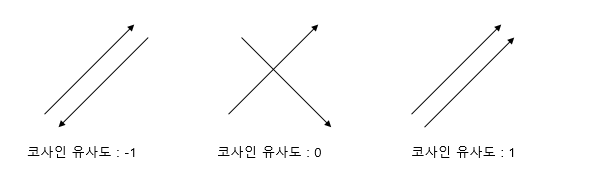

두 벡터 A, B에 대해서 코사인 유사도 식
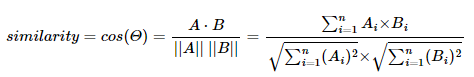
문서 단어 행렬에 대해서 코사인 유사도를 구해보는 간단한 예제를 진행
* 문서1 : 저는 사과 좋아요
* 문서2 : 저는 바나나 좋아요
* 문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

위의 세 문서에 대한 문서 단어 행렬
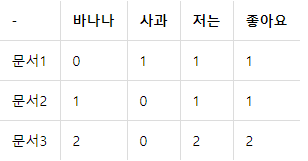

파이썬에서는 코사인 유사도를 구하는 방법은 여러가지가 있는데 여기서는 Numpy를 이용해서 계산

In [1]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B): # 코사인 유사도를 계산하는 함수
       return dot(A, B)/(norm(A)*norm(B))

In [2]:
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

In [3]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


## 유사도를 이용한 추천 시스템 구현하기
TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천 시스템을 만들 수 있음

다운로드 링크 : <https://www.kaggle.com/rounakbanik/the-movies-dataset

원본 파일은 위 링크에서 movies_metadata.csv 파일을 다운로드 받으면 됨

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [6]:
data = pd.read_csv('./movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


우선 다운로드 받은 훈련 데이터에서 2개의 샘플만 출력하여, 데이터가 어떤 형식을 갖고있는지 확인

In [9]:
data = data.head(20000)

훈련 데이터의 양을 줄이고 학습을 진행하고자 한다면, 이와 같이 데이터를 줄여서 재저장

tf-idf를 할 때 데이터에 Null 값이 들어있으면 에러가 발생합니다. tf-idf의 대상이 되는 data의 overview 열에 Null 값이 있는지 확인

In [10]:
data['overview'].isnull().sum()

135

pandas를 이용하면 Null 값을 처리하는 도구인 fillna()를 사용할 수 있음

In [11]:
# overview에서 Null 값을 가진 경우에는 Null 값을 제거
data['overview'] = data['overview'].fillna('')

In [12]:
tfidf = TfidfVectorizer(stop_words='english')
# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(data['overview'])
print(tfidf_matrix.shape)

(20000, 47487)


overview 열에 대해서 tf-idf를 수행. 20,000개의 영화를 표현하기위해 총 47,487개의 단어가 사용되었음

이제 코사인 유사도를 사용하면 바로 문서의 유사도를 구할 수 있음

In [14]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) # 코사인 유사도 계산

영화의 타이틀과 인덱스를 가진 테이블 생성

In [17]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


이 테이블의 용도는 영화의 타이틀을 입력하면 인덱스를 리턴하기 위함

In [18]:
idx = indices['Father of the Bride Part II']
print(idx)

4


이제 선택한 영화에 대해서 코사인 유사도를 이용하여, 가장 overview가 유사한 10개의 영화를 찾아내는 함수 생성

In [19]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당되는 인덱스를 받아옵니다. 이제 선택한 영화를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴합니다.
    return data['title'].iloc[movie_indices]

In [20]:
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object